In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
patients=pd.read_csv('/content/drive/MyDrive/Final Project1/patients.csv')
encounters=pd.read_csv('/content/drive/MyDrive/Final Project1/encounters.csv')
conditions=pd.read_csv('/content/drive/MyDrive/Final Project1/conditions.csv')
observations=pd.read_csv('/content/drive/MyDrive/Final Project1/observations.csv')
medications=pd.read_csv('/content/drive/MyDrive/Final Project1/medications.csv')

# **Merging Datasets**

In [3]:
#Merge Patients and Encounters
pat_enc=pd.merge(patients,encounters,how='inner',left_on='Id',right_on='PATIENT')

In [4]:
#Rename Columns
pat_enc.rename(columns={'Id_x':'PatientId',
                        'Id_y':'EncounterId',
                         'START':'Encounter_Start_Date',
                         'STOP':'Encounter_Stop_Date',
                         'CODE':'Encounter_CODE',
                         'DESCRIPTION':'Encounter_Desc'
                         },inplace=True)

In [5]:
#drop Unpredictor Variables
pat_enc.drop(['BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN','BIRTHPLACE','ETHNICITY','ADDRESS','CITY','STATE','COUNTY',
       'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE','PATIENT', 'PROVIDER',
       'PAYER','BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],axis=1,inplace=True)

In [6]:
#Merge Patients, Encounters, Conditions
pat_enc_con=pd.merge(pat_enc,conditions,how='inner',left_on='EncounterId',right_on='ENCOUNTER')

In [7]:
#rename columns
pat_enc_con.rename(columns={'DESCRIPTION':'Condition_Desc',
                    'STOP':'Condition_Stop'},inplace=True)
#drop UnPredictor Variables
pat_enc_con.drop(['PATIENT','ENCOUNTER','START','CODE','Encounter_CODE'],axis=1,inplace=True)

In [8]:
#Merge Patients, Encounters, Conditions, Observations
pat_enc_con_obs=pd.merge(pat_enc_con,observations,how='inner',left_on='EncounterId',right_on='ENCOUNTER')

In [9]:
#rename columns
pat_enc_con_obs.rename(columns={'DESCRIPTION':'Observation_Desc'
                        },inplace=True)
#drop UnPredictor Variables
pat_enc_con_obs.drop(['DATE','PATIENT','ENCOUNTER','CODE','UNITS','TYPE','VALUE'],axis=1,inplace=True)

In [10]:
#Merge Patients, Encounters, Conditions, Observations, Medications
pat_enc_con_obs_med=pd.merge(pat_enc_con_obs,medications,how='inner',left_on='EncounterId',right_on='ENCOUNTER')

In [11]:
#rename columns
pat_enc_con_obs_med.rename(columns={'DESCRIPTION':'Medication_Desc'
                        },inplace=True)
#drop UnPredictor Variables
pat_enc_con_obs_med.drop(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER',
                      'CODE','BASE_COST', 'PAYER_COVERAGE', 'DISPENSES',
                      'TOTALCOST', 'REASONCODE', 'REASONDESCRIPTION',
                      'Encounter_Start_Date', 'Encounter_Stop_Date','Encounter_Desc','EncounterId'],axis=1,inplace=True)

In [13]:
pat_enc_con_obs_med.to_csv('/content/drive/MyDrive/Final Project1/Data Process/Combined_InputData.csv',index=False)

In [14]:
working_df=pd.read_csv('/content/drive/MyDrive/Final Project1/Data Process/Combined_InputData.csv')
#working_df=pat_enc_con_obs_med.copy()

In [15]:
working_df.shape

(771090, 10)

In [16]:
working_df.columns

Index(['PatientId', 'MARITAL', 'RACE', 'GENDER', 'EncounterId',
       'ENCOUNTERCLASS', 'Condition_Stop', 'Condition_Desc',
       'Observation_Desc', 'Medication_Desc'],
      dtype='object')

# **Univariate Analysis**

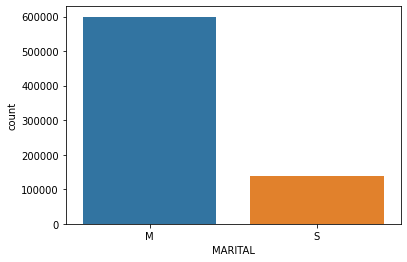

In [ ]:
sns.countplot('MARITAL',data=working_df)

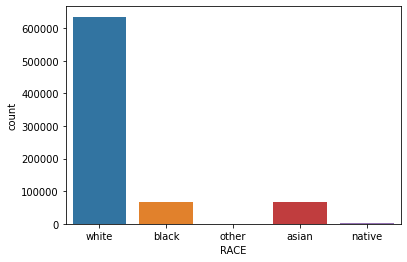

In [ ]:
sns.countplot('RACE',data=working_df)

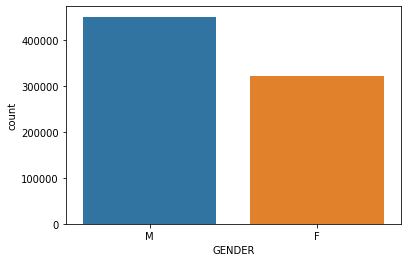

In [ ]:
sns.countplot('GENDER',data=working_df)

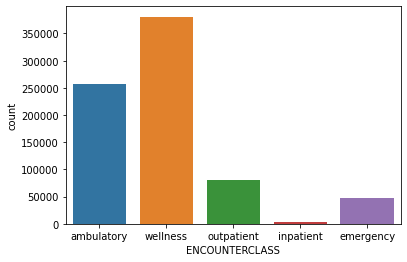

In [ ]:
sns.countplot('ENCOUNTERCLASS',data=working_df)

**Conditions diagnosed**

In [ ]:
print('Unique number of Conditions diagnosed:',len(working_df['Condition_Desc'].unique()))

Unique number of Conditions diagnosed 102


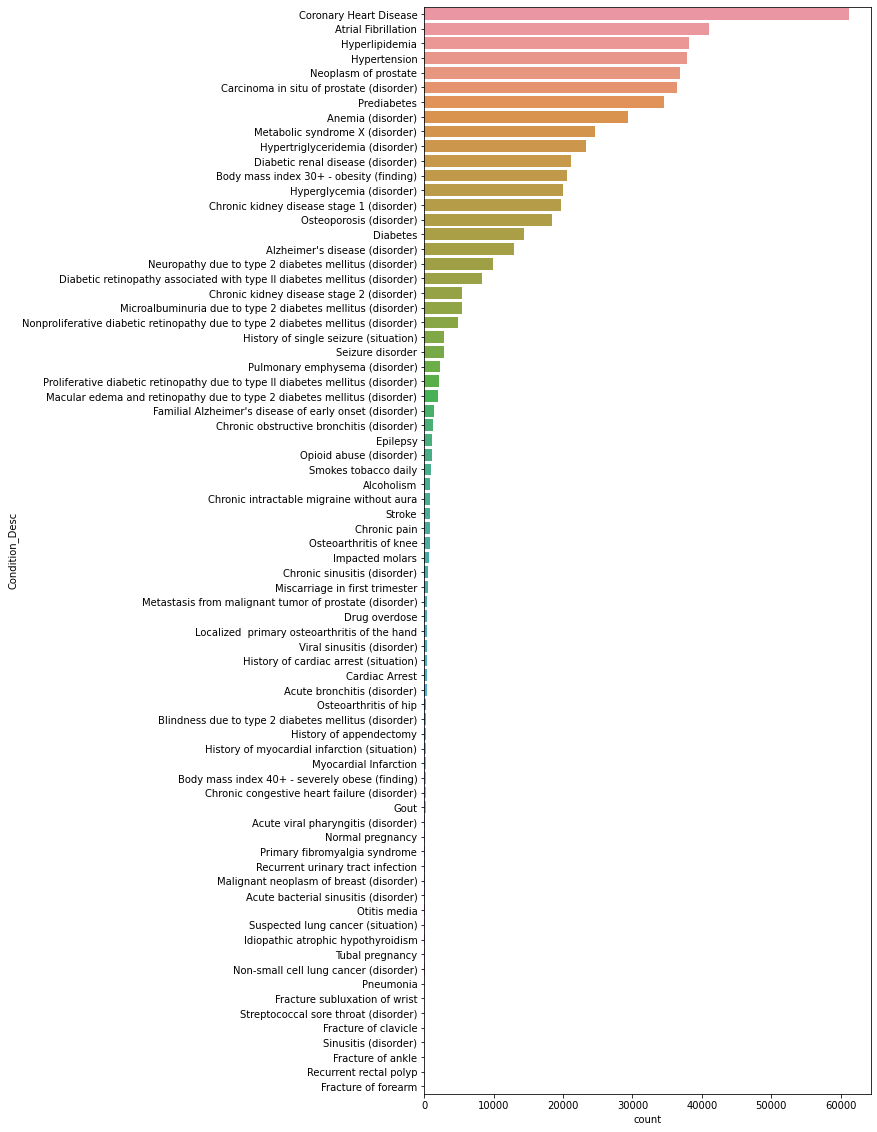

In [ ]:
condition_diagnosed=working_df[working_df['Condition_Stop'].isna()==True]['Condition_Desc']
plt.figure(figsize=(8,20))
sns.countplot(y=condition_diagnosed,order=condition_diagnosed.value_counts().index)

**Grouping Conditions**

In [17]:
diabetes=working_df[(working_df['Condition_Desc'].str.contains('type 2')==True) 
                    | (working_df['Condition_Desc'].str.contains('type II')==True)
                    | (working_df['Condition_Desc'].str.contains('Prediabetes')==True)]['Condition_Desc']
working_df['Condition_Desc']=working_df['Condition_Desc'].replace(diabetes.values,'Diabetes')

In [18]:
obesity=working_df[(working_df['Condition_Desc'].str.contains('Body mass index')==True)]['Condition_Desc']
working_df['Condition_Desc']=working_df['Condition_Desc'].replace(obesity.values,'Body Mass Index 30+ & 40+(Obesity)')

In [19]:
kidney_disease=working_df[(working_df['Condition_Desc'].str.contains('kidney disease')==True)]['Condition_Desc']
working_df['Condition_Desc']=working_df['Condition_Desc'].replace(kidney_disease.values,'Chronic kidney disease (disorder)')

In [20]:
alzheimer=working_df[(working_df['Condition_Desc'].str.contains('Alzheimer')==True)]['Condition_Desc']
working_df['Condition_Desc']=working_df['Condition_Desc'].replace(alzheimer.values,'Alzheimer disease')

In [22]:
osteoporosis=working_df[(working_df['Condition_Desc'].str.contains('Osteoporosis')==True)]['Condition_Desc']
working_df['Condition_Desc']=working_df['Condition_Desc'].replace(osteoporosis.values,'Osteoporosis')

In [23]:
print("Number of Unique Conditions after grouping",len(working_df['Condition_Desc'].unique()))

Number of Unique Conditions after grouping 91


**Observations**

In [ ]:
print("Number of Unique Observations",len(working_df['Observation_Desc'].unique()))

Number of Unique Observations 107


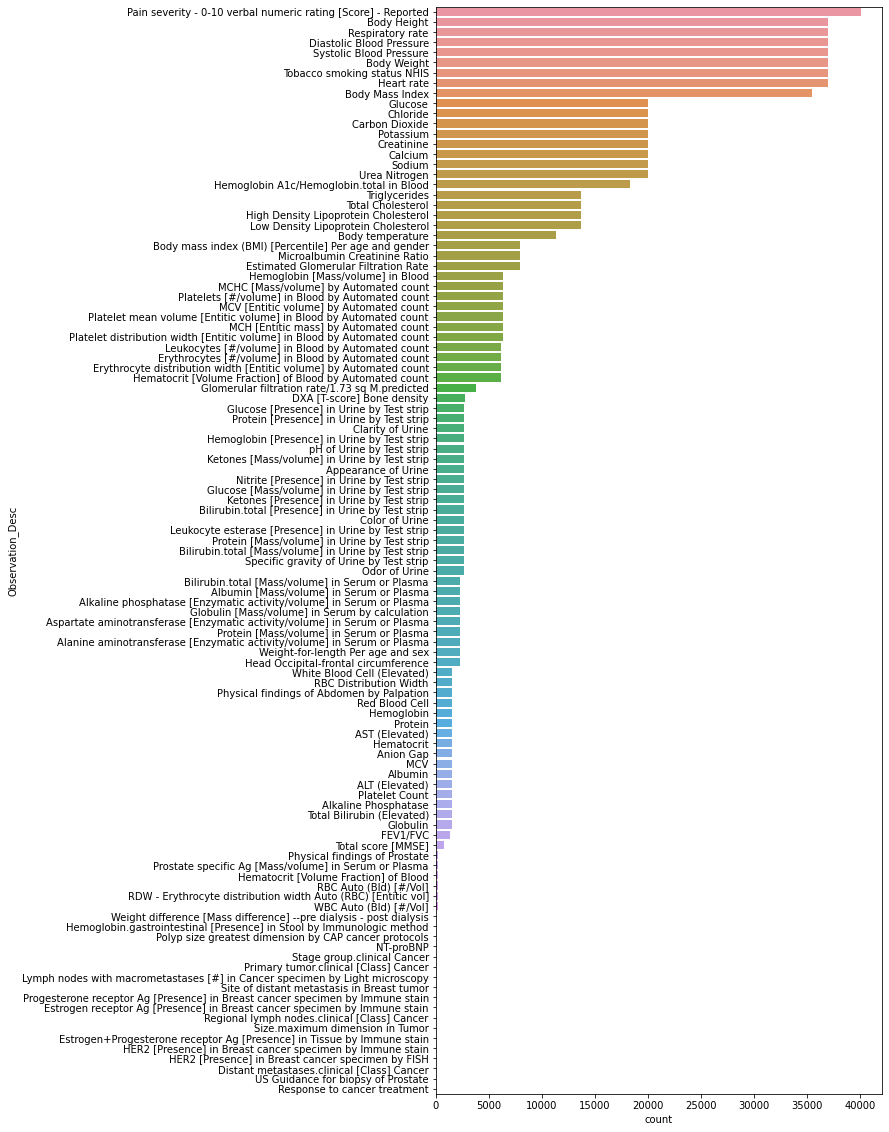

In [ ]:
plt.figure(figsize=(8,20))
working_df['Observation_Desc'].value_counts()
sns.countplot(y='Observation_Desc',data=working_df,order=working_df['Observation_Desc'].value_counts().index)

**Medications**

In [ ]:
print("Number of Unique Medications",len(working_df['Medication_Desc'].unique()))

Number of Unique Medications 99


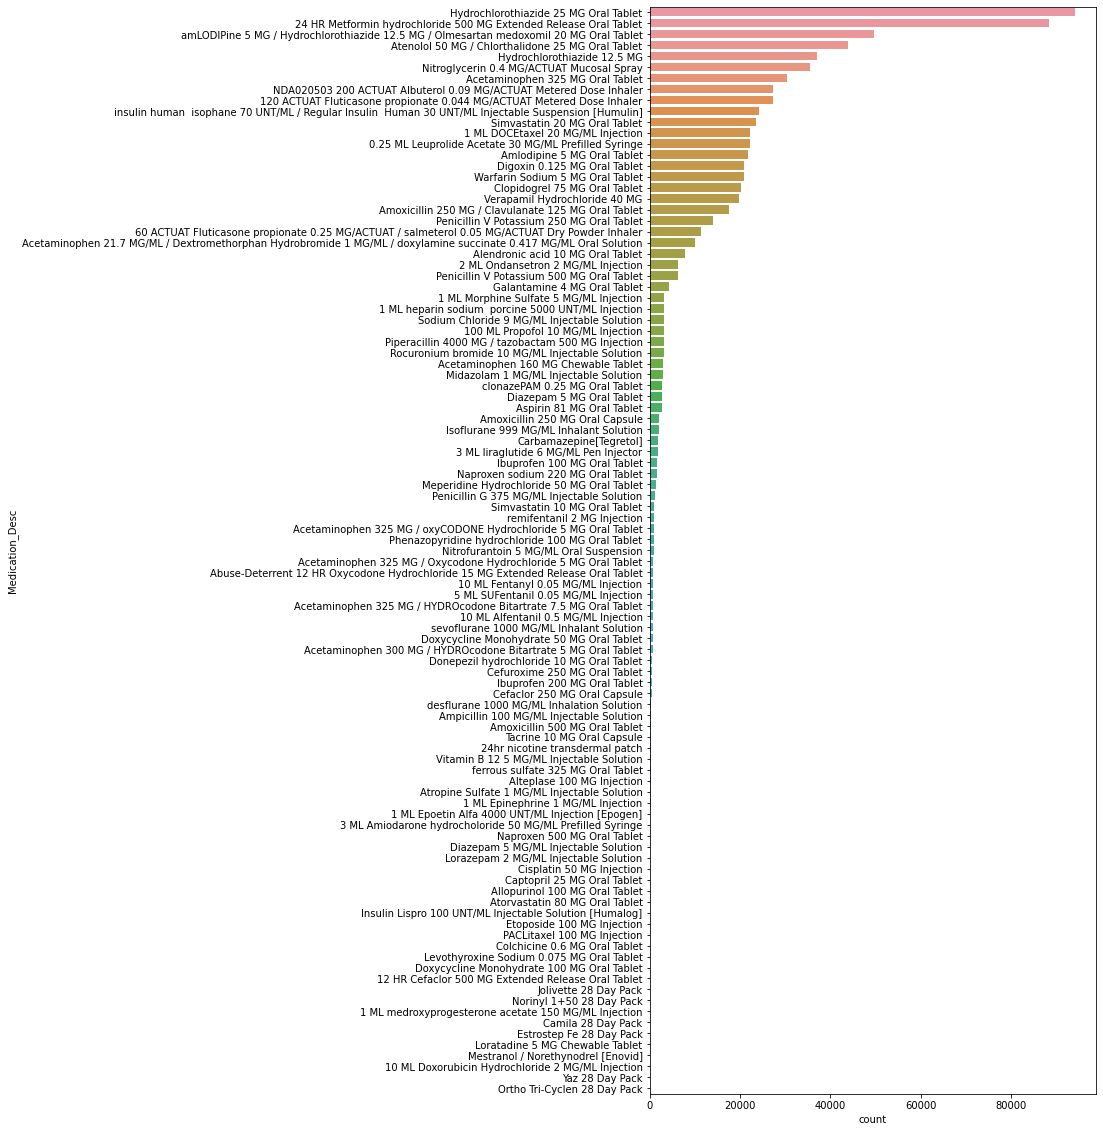

In [ ]:
plt.figure(figsize=(8,20))
sns.countplot(y='Medication_Desc',data=working_df,order=working_df['Medication_Desc'].value_counts().index)

In [ ]:
working_df.shape

(771090, 11)

# **Handling Outliers**

In [24]:
# take top 15 Conditions diagnosed that stay life long  and drop the rest 
lifelongconditions_count=working_df[working_df['Condition_Stop'].isna()==True]['Condition_Desc'].value_counts().reset_index()
less_common_conditions=lifelongconditions_count[lifelongconditions_count['Condition_Desc']<10000]['index']
working_df.drop(working_df[working_df['Condition_Desc'].isin(less_common_conditions)==True].index,axis=0,inplace=True)

In [25]:
# drop the acute conditions 
acuteconditions=working_df[working_df['Condition_Stop'].isna()==False]['Condition_Desc'].value_counts().reset_index()
less_common_acute_conditions=acuteconditions['index']
working_df.drop(working_df[working_df['Condition_Desc'].isin(less_common_acute_conditions)==True].index,axis=0,inplace=True)

In [26]:
print("Number of Conditions diagnosed after removing Outliers",len(working_df['Condition_Desc'].unique()))

Number of Conditions diagnosed after removing Outliers 15


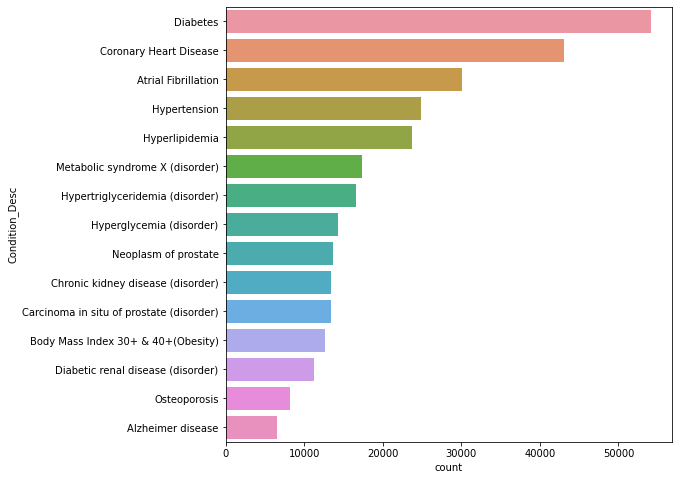

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Condition_Desc',data=working_df,order=working_df['Condition_Desc'].value_counts().index)

In [27]:
df=working_df['Medication_Desc'].value_counts().reset_index()
med_outlier_indexes=working_df[working_df['Medication_Desc'].isin(df[df['Medication_Desc']<10000]['index'])==True].index
working_df.drop(med_outlier_indexes,axis=0,inplace=True)

In [28]:
print("Number of Medications after removing Outliers",len(working_df['Medication_Desc'].unique()))

Number of Medications after removing Outliers 17


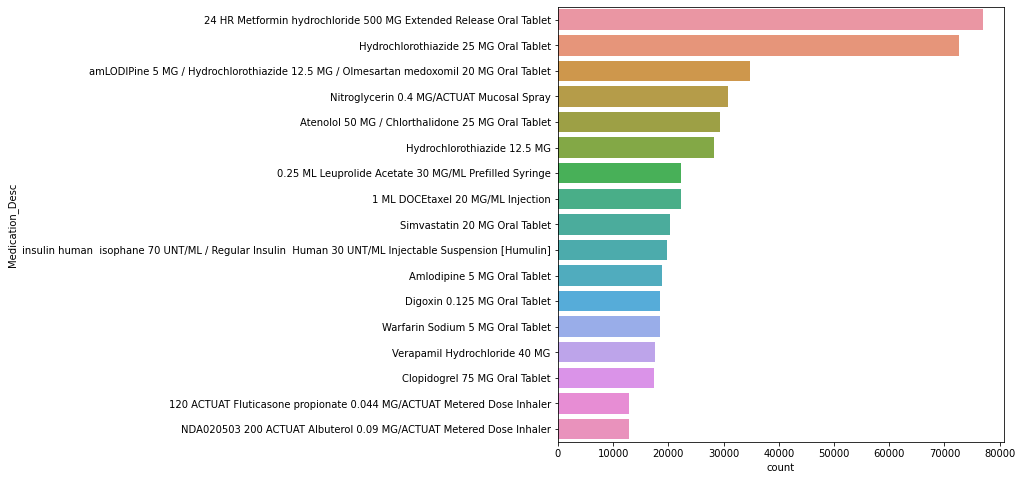

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Medication_Desc',data=working_df,order=working_df['Medication_Desc'].value_counts().index)

In [29]:
df=working_df['Observation_Desc'].value_counts().reset_index()
obs_outlier_indexes=working_df[working_df['Observation_Desc'].isin(df[df['Observation_Desc']<10000]['index'])==True].index
working_df.drop(obs_outlier_indexes,axis=0,inplace=True)

In [30]:
redundant_obs_indexes=working_df[working_df['Observation_Desc'].isin(['Body Height','Body Weight'])==True].index
working_df.drop(redundant_obs_indexes,axis=0,inplace=True)

In [31]:
print("Number of Observations after removing Outliers",len(working_df['Observation_Desc'].unique()))

Number of Observations after removing Outliers 20


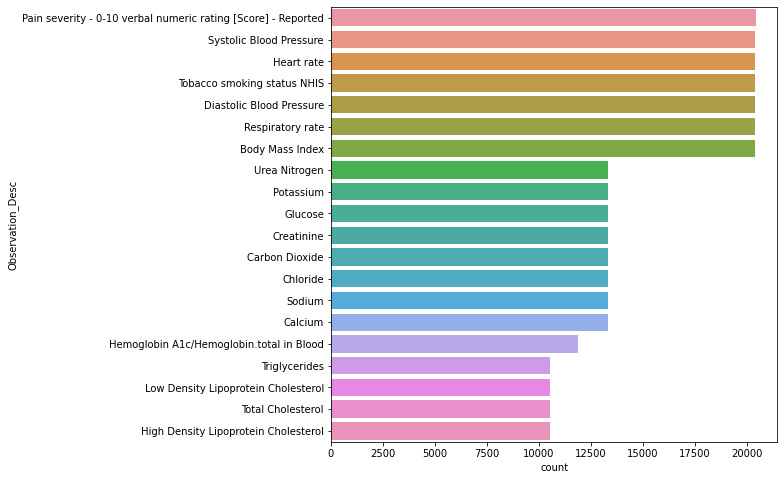

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Observation_Desc',data=working_df,order=working_df['Observation_Desc'].value_counts().index)

# **Handling Null Values**

In [ ]:
working_df.isnull().sum()

PatientId                0
MARITAL               7471
RACE                     0
GENDER                   0
EncounterId              0
ENCOUNTERCLASS           0
Encounter_Desc           0
Condition_Stop      303483
Condition_Desc           0
Observation_Desc         0
Medication_Desc          0
dtype: int64

In [32]:
working_df['MARITAL'].fillna('UNKNOWN',inplace=True)

# **Bivariate Analysis**: 



Gender vs Condition diagnosed

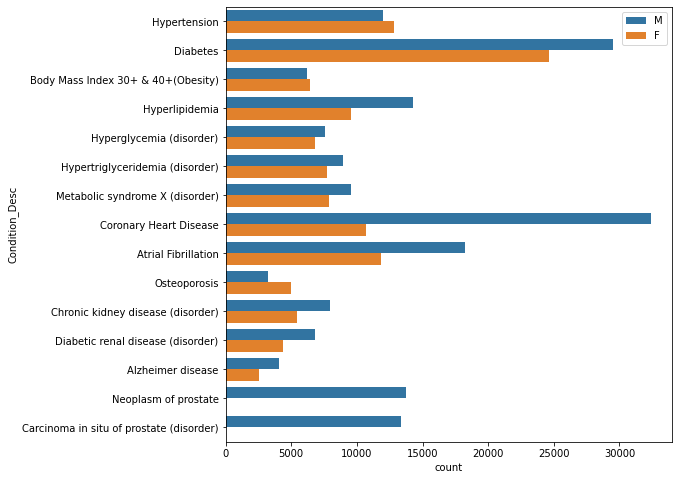

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Condition_Desc',data=working_df,hue='GENDER')
plt.legend(loc='upper right')
plt.show()

Based on above plot,<br> *`Obesity, Hypertension, Acute Cholecystitis, Cholelithiasis, Osteoporosis`* are more prevelant in Female than Men <br>

*`Neoplasm of prostate , Carcinoma in situ of prostate (disorder)`* occured only in Men.

MARITAL vs Condition diagnosed

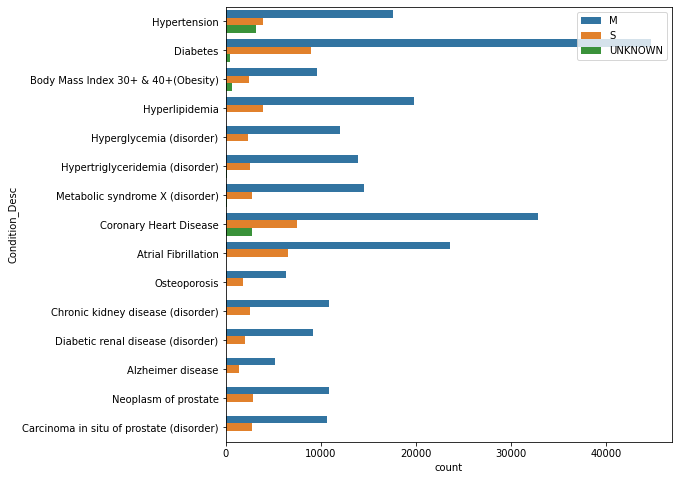

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Condition_Desc',data=working_df,hue='MARITAL')
plt.legend(loc='upper right')
plt.show()

Diseases are more among Married People 

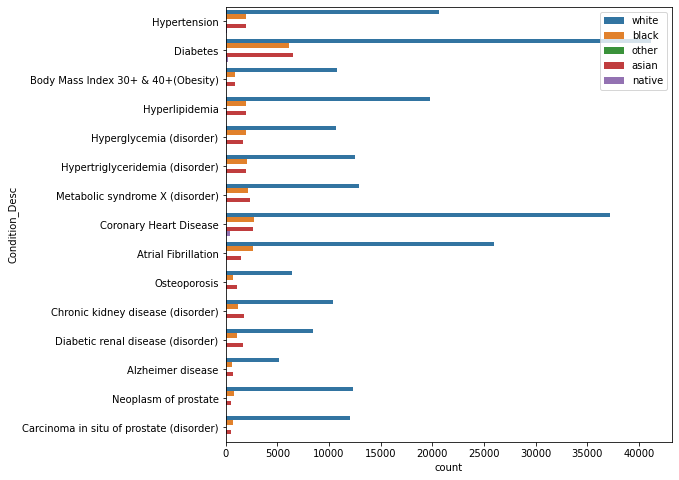

In [ ]:
#RACE vs Condition diagnosed
plt.figure(figsize=(8,8))
sns.countplot(y='Condition_Desc',data=working_df,hue='RACE')
plt.legend(loc='upper right')
plt.show()

White People encountered several times to Hospital than other race.

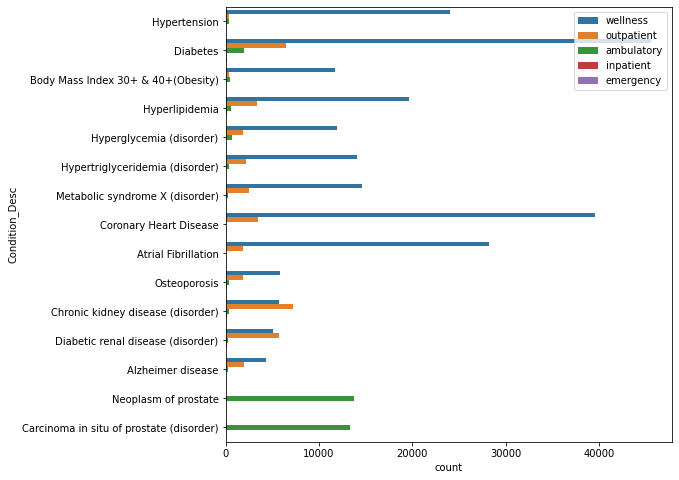

In [ ]:
#Encounter Class vs Condition diagnosed
plt.figure(figsize=(8,8))
sns.countplot(y='Condition_Desc',data=working_df,hue='ENCOUNTERCLASS')
plt.legend(loc='upper right')
plt.show()

People affected by below diseases are admitted to hospital only through Ambulatory.<br>

*Neoplasm of prostate* <br>
*Carcinoma in situ of prostate*

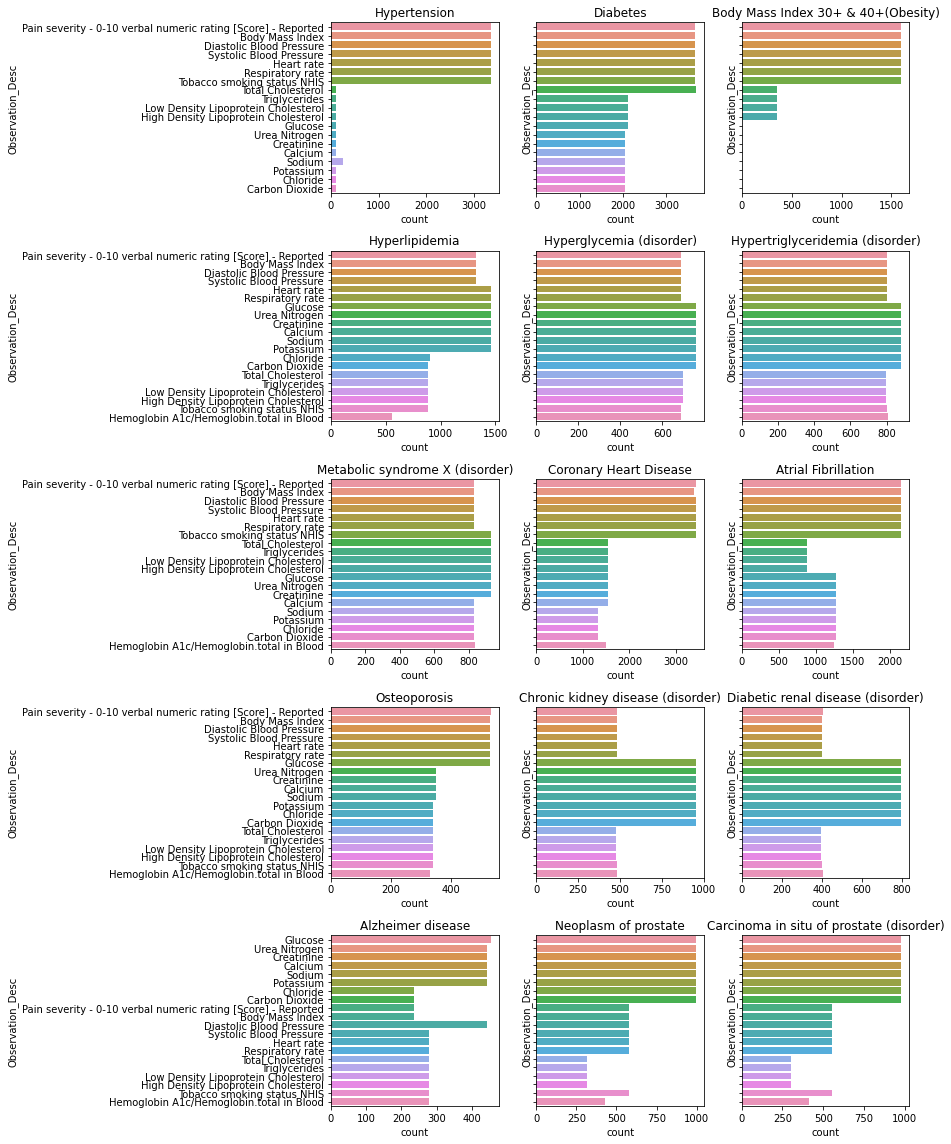

In [ ]:
# Conditions vs Observations
fig,axes=plt.subplots(5,3,figsize=(13,16),sharey='row')
conditions=working_df['Condition_Desc'].unique()
for i,cond in enumerate(conditions):
  df_obs=working_df[working_df['Condition_Desc']==cond]['Observation_Desc']
  sns.countplot(y=df_obs,ax=axes.flatten()[i])
  axes.flatten()[i].set_title(cond)

fig.tight_layout()
plt.show()

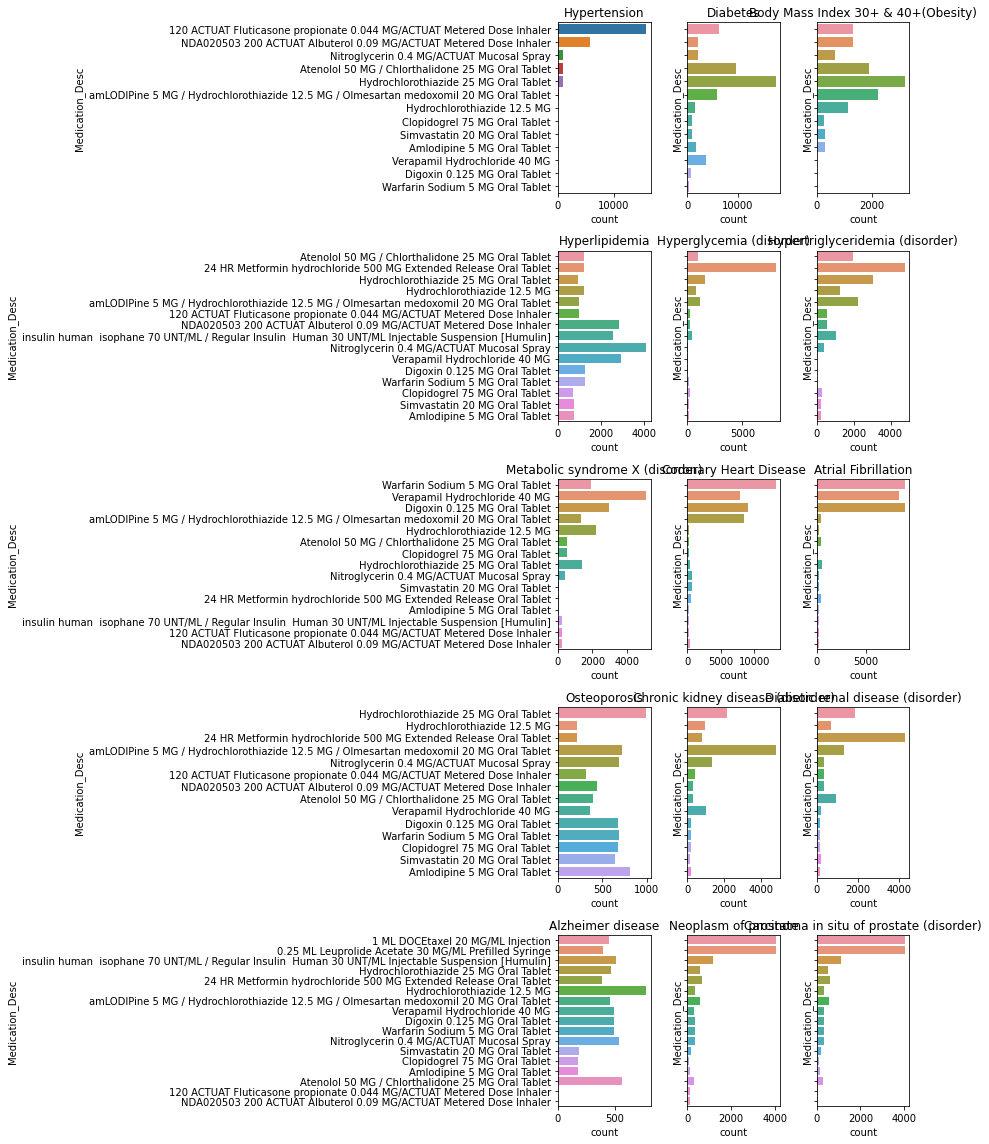

In [ ]:
# Conditions vs Medications
fig,axes=plt.subplots(5,3,figsize=(13,16),sharey='row')
conditions=working_df['Condition_Desc'].unique()
for i,cond in enumerate(conditions):
  df_med=working_df[working_df['Condition_Desc']==cond]['Medication_Desc']
  sns.countplot(y=df_med,ax=axes.flatten()[i])
  axes.flatten()[i].set_title(cond)
fig.tight_layout()
plt.show()

# **Handling Categorical Variables**

In [40]:
working_df.drop(['Condition_Stop'],axis=1,inplace=True)
working_df=working_df.set_index('PatientId')

In [ ]:
working_df.to_csv('/content/drive/MyDrive/Final Project1/Data Process/processed_input.csv',index=False)
working_df=pd.read_csv('/content/drive/MyDrive/Final Project1/Data Process/processed_input.csv')

In [33]:
!pip install kmodes

In [34]:
from kmodes.kmodes import KModes

In [41]:
working_df.head()

,MARITAL,RACE,GENDER,ENCOUNTERCLASS,Condition_Desc,Observation_Desc,Medication_Desc
PatientId,,,,,,,
c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,M,white,M,wellness,Hypertension,Pain severity - 0-10 verbal numeric rating [Sc...,Hydrochlorothiazide 25 MG Oral Tablet
c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,M,white,M,wellness,Hypertension,Body Mass Index,Hydrochlorothiazide 25 MG Oral Tablet
c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,M,white,M,wellness,Hypertension,Diastolic Blood Pressure,Hydrochlorothiazide 25 MG Oral Tablet
c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,M,white,M,wellness,Hypertension,Systolic Blood Pressure,Hydrochlorothiazide 25 MG Oral Tablet
c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,M,white,M,wellness,Hypertension,Heart rate,Hydrochlorothiazide 25 MG Oral Tablet


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1091681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1091681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1091681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1091681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1091681.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4572, cost: 1039176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 25593, cost: 967674.0
Init: initializing centroids
Init: initializing cluster

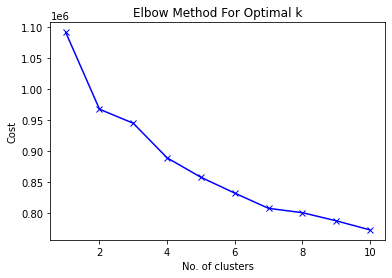

In [42]:
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(working_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
# Building the model with 7 clusters
kmode = KModes(n_clusters=7, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(working_df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 87311, cost: 859559.0
Run 1, iteration: 2/100, moves: 6755, cost: 859559.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 128512, cost: 846935.0
Run 2, iteration: 2/100, moves: 9917, cost: 840922.0
Run 2, iteration: 3/100, moves: 1835, cost: 840922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 114175, cost: 808638.0
Run 3, iteration: 2/100, moves: 17556, cost: 808293.0
Run 3, iteration: 3/100, moves: 59, cost: 808293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 101953, cost: 871516.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 68641, cost: 837259.0
Best run was number 3


array([0, 0, 0, ..., 1, 0, 3], dtype=uint16)

In [147]:
working_df.groupby('Cluster').count()

,MARITAL,RACE,GENDER,ENCOUNTERCLASS,Condition_Desc,Observation_Desc,Medication_Desc
Cluster,,,,,,,
0,90184,90184,90184,90184,90184,90184,90184
1,39758,39758,39758,39758,39758,39758,39758
2,72988,72988,72988,72988,72988,72988,72988
3,45909,45909,45909,45909,45909,45909,45909
4,18966,18966,18966,18966,18966,18966,18966
5,26349,26349,26349,26349,26349,26349,26349
6,9329,9329,9329,9329,9329,9329,9329


**1. Identify a cluster with the maximum number of diabetes patients:**

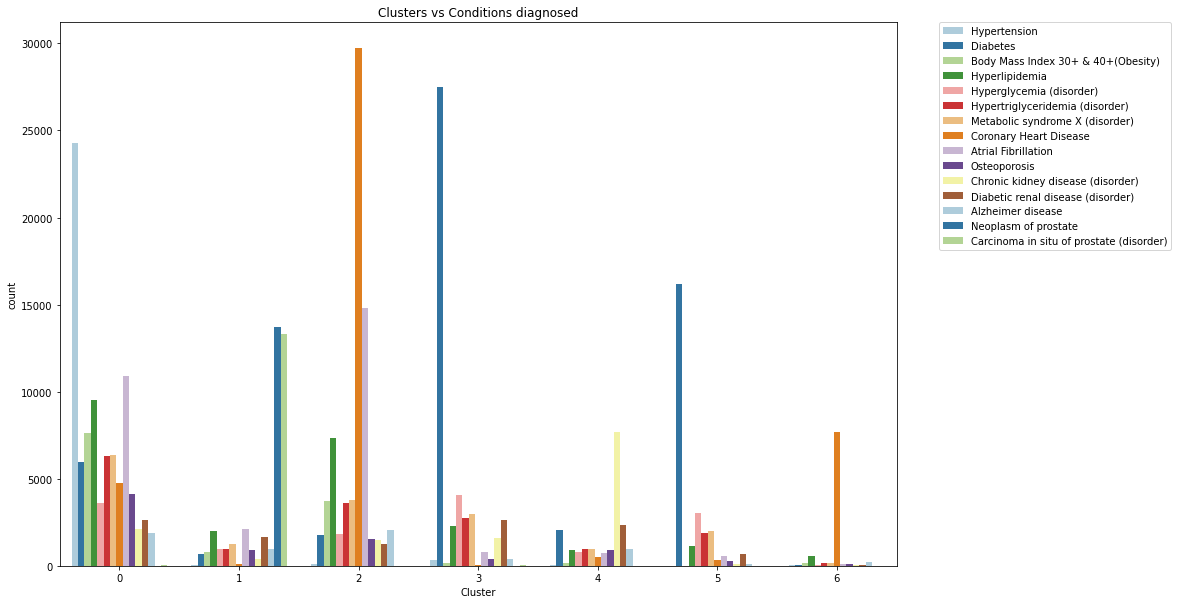

In [141]:
plt.figure(figsize=(15,10))
sns.countplot(x='Cluster',data=working_df,hue='Condition_Desc',palette=sns.color_palette("Paired", 15))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title('Clusters vs Conditions diagnosed')
plt.show()

From the above plot, **Cluster 3** has more Diabetic Patients


**2. What are the other common conditions that the patients in this cluster are diagnosed with?:**

Text(0.5, 1.0, 'Other Conditions in Cluster 3 along with Diabetes')

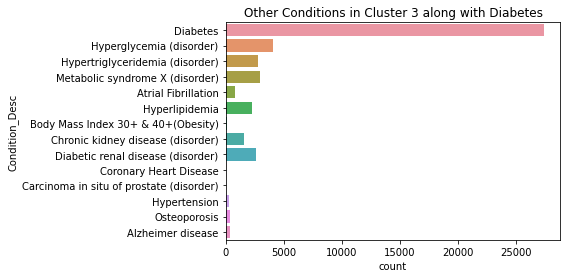

In [149]:
cluster3=working_df[working_df['Cluster']==3]
sns.countplot(y='Condition_Desc',data=cluster3)
plt.title("Other Conditions in Cluster 3 along with Diabetes")

**3. What are the common medications that the patients in this cluster are prescribed?**

Text(0.5, 1.0, 'Medications prescribed to Patients in Cluster 3')

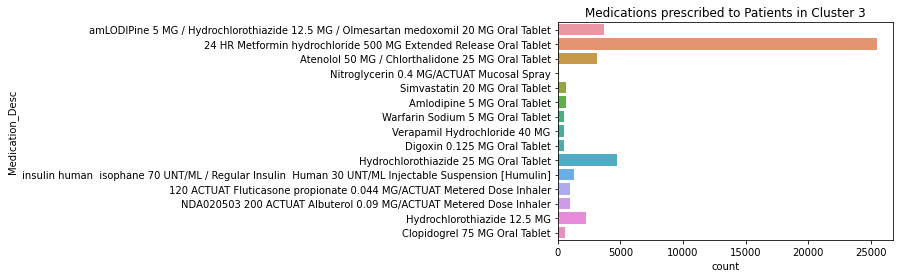

In [156]:
sns.countplot(y='Medication_Desc',data=working_df[(working_df['Cluster']==3)])
plt.title('Medications prescribed to Patients in Cluster 3')

 Are these different from the ones that are prescribed to diabetes patients in general?

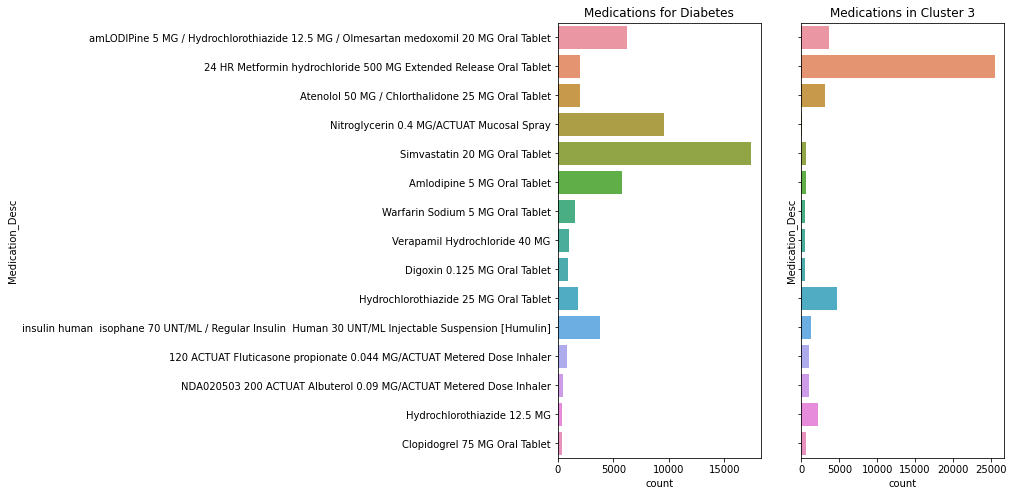

In [155]:
Diabetes_Medications=working_df[(working_df['Condition_Desc']=='Diabetes')]
Cluster3_Medications=working_df[(working_df['Cluster']==3)]

fig,axes=plt.subplots(1,2,sharey='all',figsize=(8,8))
sns.countplot(y='Medication_Desc',data=Diabetes_Medications,ax=axes.flatten()[0])
sns.countplot(y='Medication_Desc',data=Cluster3_Medications,ax=axes.flatten()[1])
axes.flatten()[0].set_title('Medications for Diabetes')
axes.flatten()[1].set_title('Medications in Cluster 3')

plt.show()

Based on Above figure, Medicines prescribed in Cluster 3 are same as Diabetes Medicines.

**4. How are the observations for the patients in this cluster different from those for diabetes
patients in general?**

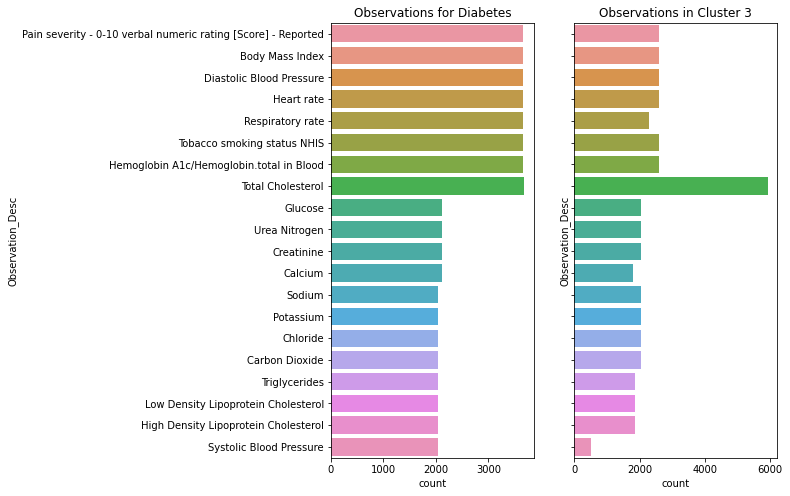

In [154]:
Diabetes_Observations=working_df[(working_df['Condition_Desc']=='Diabetes')]
Cluster3_Observations=working_df[(working_df['Cluster']==3)]

fig,axes=plt.subplots(1,2,sharey='all',figsize=(8,8))
sns.countplot(y='Observation_Desc',data=Diabetes_Observations,ax=axes.flatten()[0])
sns.countplot(y='Observation_Desc',data=Cluster3_Observations,ax=axes.flatten()[1])
axes.flatten()[0].set_title('Observations for Diabetes')
axes.flatten()[1].set_title('Observations in Cluster 3')

plt.show()


Based on above figure, Observations for Diabetes and Observations in Cluster 3 are same.

**Conclusion:**<br>
The dataset contains only categorical features, so KModes Algorithm is chosen to cluster the data.Using Elbow method, identified Optimial K(Number of Cluster)=7. Then Fit and Predict the data using KModes algorithm with n_clusters=7. 